# Linked Lists (Part - B)

### 💁‍♀️ Creating a class for node

In [2]:
//  "Node" class
class Node{
  // '''Initializes Node object'''
  constructor(data=null){
    this.data = data;  // Assign data
    this.next = null;  // Initialize next as null
  }
}  

### 💁‍♀️ Creating a class for Linked List

In [3]:
// LinkedList Class
class BaseLinkedList{

    //  `Every function have this parameter in first`

    constructor(){
    //  Function to initialize head
    this.head = null
    }
    
    //  Add element into linked list
    //  links every new data block to head

    add(data){
        let node = new Node(data); // use above node class
        node.next = this.head; // join new element at front
        this.head = node; // assign new head 
    }

    parse(){
       let temp = this.head;
       let result = [];

        while(temp){
            result.push(temp.data);
            temp = temp.next;
        }
        return result
    }
        

    //  This function prints contents of linked list
    //  starting from head

    printList(){
        temp = self.head
        // loop until temp reaches None(None indicates end of list)
        while (temp){
           console.log(temp.data);
           if(temp.next !== null){
            console.log(' -> ')
           }
        }
    }
}

### 💁‍♀️ Basic usage of Linked Lists

In [4]:
let sll = new BaseLinkedList()
sll.add(10)
sll.add(20)
sll.add(30)

sll.printList()

// # Output here is
// # 30 -> 20 -> 10

30  -> 20  -> 10 


### ⚠️ Please make sure to run the above code-blocks before you start with your implementations 👆

---
# Instructions
- In the below assignments, **do not** do this: convert the list into array using `parse` method above or similar, do the array manipulation & build the linked list from array. That defeats the point.
- Or anything that bypasses core processing of the list in pure/authentic way

### ❓ [#1] Swap adjacent nodes
Given a linked list, swap every two adjacent nodes

Example:  Given `1->2->3->4`, after executing swap function your list will be like `2->1->4->3`.

In [ ]:
class LinkedList extends BaseLinkedList{

    constructor(){
        this.head = new Node(10)
        this.head.next = new Node(20)
        this.head.next.next = new Node(30)
        this.head.next.next.next = new Node(40)
        this.head.next.next.next.next = new Node(50)

    }

    swapAdjacentNodes(){
        if(!this.head || !this.head.next){
            return this.head
        }
        let current = this.head;
        let prev = null;
        let temp;
        while (current && current.next){
            temp = current.next;
            current.next = temp.next;
            temp.next = current;

            if(prev == null){
            this.head = temp;
            }else{
                prev.next = temp;
            }

            prev = current;
            current = current.next;
        }

    }

}

        




let sll = new LinkedList()
sll.swapAdjacentNodes()

console.assert(sll.parse() == [20, 10, 40, 30, 50])

### ❓ [#2] Reverse every `k` nodes in a linked list.

Given a linked list and you need to reverse each k nodes

In [ ]:
class LinkedList extends BaseLinkedList{
    constructor(){
        this.head = new Node(10)
        this.head.next = new Node(20)
        this.head.next.next = new Node(30)
        this.head.next.next.next = new Node(40)
        this.head.next.next.next.next = new Node(50)

    }

    reverseEachKNodes(h,k){
        if (h == null){
            return null;
        }
        let count = 0;
        let prev = null;
        let next = null;
        let current = h;
        while (count<k && current != null) {
            next = current.next;
            current.next = prev;
            prev = current;
            current = next;
            count+= 1
            
        }
        if(next !== null){
            h.next = this.reverseEachKNodes(next,k);
        }
        this.head = prev;
        return this.head;
    }
}

    




let sll = new LinkedList()

let k = 2
sll.reverseEachKNodes(k)

//  k -> 2
console.assert(sll.parse() == [20, 10, 40, 30, 50])

k = 3
sll.reverseEachKNodes(k)

// k -> 3
console.assert(sll.parse() == [40, 10, 20, 50, 30])


### ❓ [#3] Remove `n`th node from end of the list

Note : `n` is the position and not the index

In [ ]:
class LinkedList extends BaseLinkedList{
    constructor(){
        this.head = new Node(10);
        this.head.next = new Node(20);
        this.head.next.next = new Node(30);
        this.head.next.next.next = new Node(40);
        this.head.next.next.next.next = new Node(50);
        this.size = 5;
    }


    removeNthNodeFromEnd(n){
        if(n > this.size || n <= 0){
            return
        }
        if(n === this.size){
            this.head = this.head.next;
            this.size -= 1
            return
        }
        let position = this.size - n;
        let index = 0
        let temp = this.head;

        while (index <position-1){
            temp = temp.next
            index += 1
        }
        let node = temp.next.next;
        temp.next = node;
        this.size -= 1
        return

    }

}





let sll = new LinkedList();

let n = 2
sll.removeNthNodeFromEnd(n);

// # n -> 2
console.assert(sll.parse() == [10, 20, 30, 50])

n = 1
sll.removeNthNodeFromEnd(n)

// # n -> 1
console.assert(sll.parse() == [10, 20, 30])

n = 20
sll.removeNthNodeFromEnd(n)

// # n -> 20
console.assert(sll.parse() == [10, 20, 30])

n = -10
sll.removeNthNodeFromEnd(n)

// # n -> -10
console.assert(sll.parse() == [10, 20, 30])

### ❓ [#4] Find if given list forms a cycle

Example: 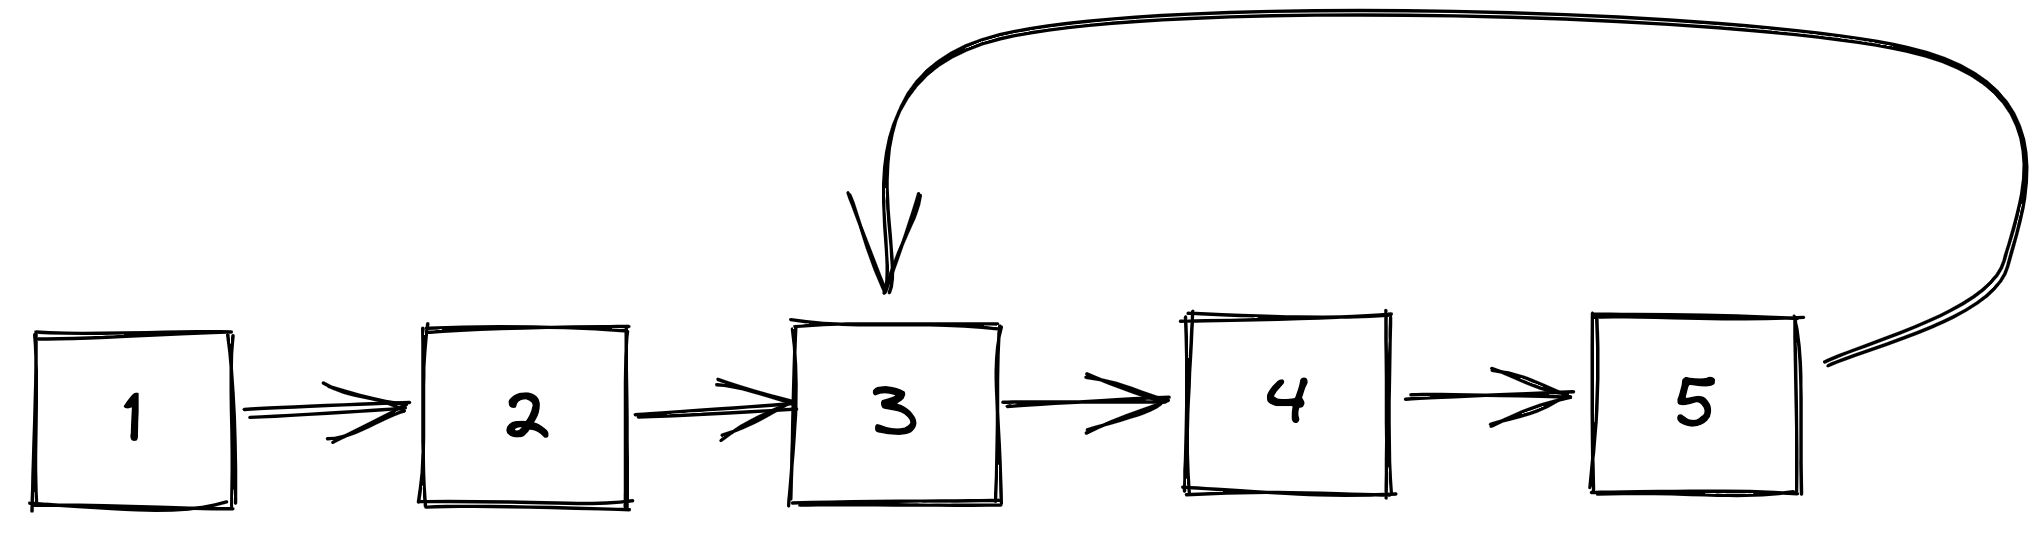

In [ ]:
class LinkedList extends BaseLinkedList{
    constructor(){
        this.head = new Node(10)
        this.head.next = new Node(20)
        this.head.next.next = new Node(30)
        this.head.next.next.next = new Node(40)
        this.head.next.next.next.next = new Node(50)
        this.head.next.next.next.next.next = self.head.next.next.next;
    }

    isCyclicList(){
        if(this.head === null) return;
        
        let fast = this.head;
        let slow = this.head;

        while (fast != null && fast.next != null){
            fast = fast.next.next;
            slow = slow.next;
            if(fast === slow){
                return true 
            }
        }
        return false
        
    }


}


let ssl = new LinkedList();

ssl.isCyclicList();

